# Лабораторная работа №2

## Исследование характера движения линейного и нелинейного осциллятора под действием периодической сили с использованием метода Рунге-Кутта

### Цель работы
Исследовать моделирование характера
движения линейного и нелинейного осциллятора под действием силы с использованием метода Рунге-Кутта.

### Ключевые понятия
Математический осциллятор (mathematical oscillator); периодические колебания (periodic oscillations);
артефакты в приближённых решениях (artefacts in numerical solutions); резонанс (resonanse);
точность вычислительных методов (accuracy of numerical methods)

### Теоретические основы
Движение системы с одной степенью
свободы вблизи положения равновесия можно представить в виде модели гармонического осциллятора:
\begin{equation*}
\frac{d^2 x}{dt^2} + \lambda \cdot \frac{dx}{dt} + \omega^2 \cdot x = 0.
\end{equation*}
Рассмотрим движение маятника с точкой подвеса, который движется вертикально.
При существовании периодической силы $f_0 = A \cdot \cos \left( \beta \cdot t \right)$
уравнение движения принимает вид:
\begin{equation*}
\frac{d^2 x}{dt^2} + \lambda \cdot \frac{dx}{dt} + \left( \omega^2 + f_0 \right) \cdot x = 0.
\end{equation*}
Уравнение нелинейного маятника с учётом трения и периодической силы записывается в виде:
\begin{equation*}
\frac{d^2 x}{dt^2} + \lambda \cdot \frac{dx}{dt} + \left( \omega^2 + f_0 \right) \cdot \sin \, x = 0.
\end{equation*}

Чтобы решить это уравнение аналитически, будем использовать `sympy`.
`Sympy` предоставляет модуль `ODE` (обыкновенных дифференциальных уравнений) для таких задач.

In [1]:
from sympy import init_printing, symbols, exp, Function, dsolve, Derivative, Eq, solve, simplify, plot, sqrt, I
from sympy.plotting import plot_parametric

In [2]:
init_printing()

Вначале определим наши символы и функцию:

In [3]:
l, w, f_0, x_0, v_0, t = symbols('l, w, f_0, x_0, v_0, t')
x = Function('x')

Можем использовать `dsolve`, которая работает с дифференциальными уравнениями:

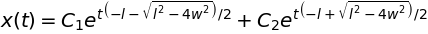

In [4]:
sol = dsolve(Derivative(x(t), t, 2) + l * Derivative(x(t), t, 1) + w ** 2 * x(t))
sol

Определим начальные условия:

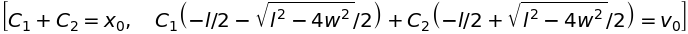

In [5]:
ics = [Eq(sol.args[1].subs(t, 0), x_0), Eq(sol.args[1].diff(t).subs(t, 0), v_0)]
ics

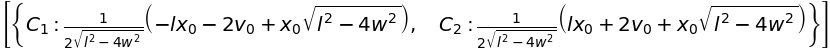

In [6]:
solved_ics = solve(ics)
solved_ics

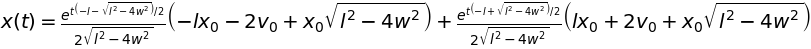

In [7]:
full_sol = sol.subs(solved_ics[0])
full_sol

Это уравнение было получено с помощью `sympy` и содержит решение нашей задачи.

Нарисуем решение.

Будем рассматривать три задачи:
- апериодическое движение `l = 26`;
- периодическое движение `l = 0`;
- движение с затуханием `l = 5`.

Будем считать, что $w = 5, x_0 = 0, v_0 = 7$.

In [8]:
%matplotlib inline

In [9]:
case1 = simplify(full_sol.subs({x_0:0, v_0:7, w:5, l:26}))
case1

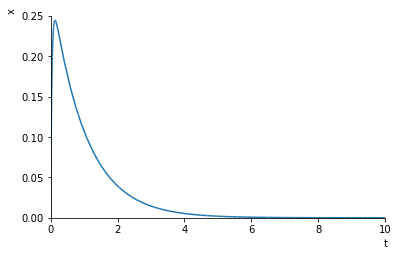

In [10]:
plot(case1.rhs, (t, 0, 10), xlabel='t', ylabel='x')

In [11]:
der1 = -7 * exp(-t) / 24 + 7 * 25 * exp(-25 * t) / 24
der1

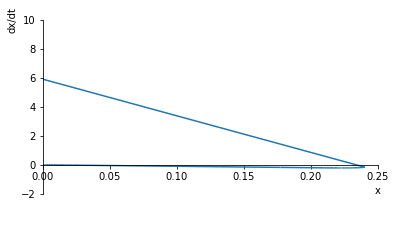

In [12]:
plot_parametric(case1.rhs, der1, xlim=(0, 0.25), ylim=(-5, 10), xlabel='x', ylabel='dx/dt')

In [13]:
case2 = simplify(full_sol.subs({x_0:0, v_0:7, w:5, l:0}))
case2

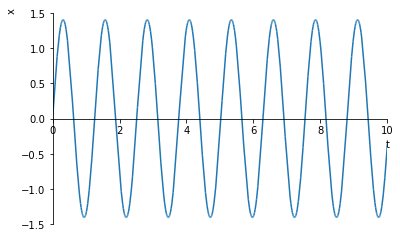

In [14]:
plot(case2.rhs, (t, 0, 10), xlabel='t', ylabel='x')

In [15]:
der2 = 35 * exp(-5 * I * t) / 10 + 35 * exp(5 * I * t) / 10
der2

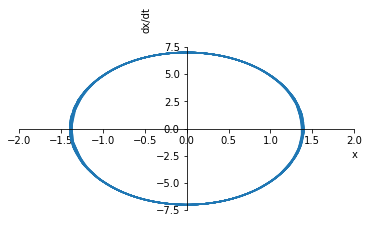

In [16]:
plot_parametric(case2.rhs, der2, xlim=(-2, 2), ylim=(-10, 10), xlabel='x', ylabel='dx/dt')

In [17]:
case3 = simplify(full_sol.subs({x_0:0, v_0:7, w:5, l:5}))
case3

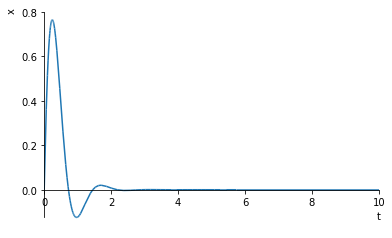

In [18]:
plot(case3.rhs, (t, 0, 10), xlabel='t', ylabel='x')

In [19]:
der3 = - 7 * I * (sqrt(3) * I + 1) / (2 * sqrt(3)) * exp(5 * t * (1 - sqrt(3) * I) / 2 - 5 * t) - 7 * I * (sqrt(3) * I - 1) / (2 * sqrt(3)) * exp(5 * t * (1 + sqrt(3) * I) / 2 - 5 * t)
der3

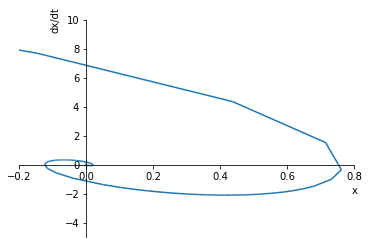

In [20]:
plot_parametric(case3.rhs, der3, xlim=(-0.2, 0.8), ylim=(-5, 10), xlabel='x', ylabel='dx/dt')

### Контрольные вопросы
#### 1
Какое физическое задание описывает уравнение осциллятора?
Чему соответствуют физическо переменные $x$ и $y$ в задании?
В каком направлении действует периодическая сила?

*Ответ: Осциллятор -- система, совершающая колебания,
то есть показатели которой периодически повторяются во времени.
Гармонический осциллятор -- система, которая при выведении её из положения равновесия испытывает действие возвращающей силы $f_0$, пропорциональной смещению $x : f_0 = -k \cdot x$, где $k$ -- постоянный коэффициент.
$x$ -- смешение материальной точки относительно её положения равновесия.*

#### 2
В чём состоит нелинейность?

*Ответ: Нелинейность осциллятора в случае периодической силы с затуханием состоит в нелинейной функции $sin x$.*

#### 3
Какие слагаемые в уравнении осциллятора отвечают за какие процессы?

*Ответ: Величину $\omega^2$ называют циклической частотой (имеется в виду круговая частота,
измеряющаяся в радианах за секунду).
Коэффициент $\lambda$ носит название постоянной затухания.
$A$ -- амплитуда колебаний, $\beta$ -- частота колебаний.*

#### 4
Какие эффекты возможны теоретически в нелинейной осцилляторе с периодической силой?
Какие эффекты возможны теоретически в линейном осцилляторе с периодической силой?

*Ответ: Если частота вынуждающей силы стремится к частоте собственных колебаний осциллятора,
то амплитуда неограниченно возрастает.
Это явление называется резонансом.
Таком образом, если частота вынуждающей силы близка к резонансной частоте,
то даже очень малой внешней силой можно вызвать ощутимые колебания в системе.
В осцилляторе с трением свободные колебания затухают с экспоненциальной скоростью и, в конце концов, система совершает только вынужденные колебания.
Амплитуда вынужденных колебаний при приближении частоты вынуждающей силы к частоте
собственных колебаний осциллятора не возрастает неограниченно, а лишь до некоторой конечной величины.*

*В случае нелинейного осциллятора частота свободных колебаний обычно зависит от амплитуды.
В отличие от линейного случае амплитуда вынужденных колебаний остаётся конечной даже при точном совпадении частот.
С ростом амплитуды увеличивается нелинейный сдвиг частоты и резонанскые условия нарушаются.
Вследствие этого нарастание амплитуры ограничивается.
Совокупность явлений,
которые наблюдаются в нелинейном осцилляторе при внешнем периодическом воздействии и проявляются в изменении
качественной природы и количественных характеристик вынужденных колебаний в зависимости от амплитуды и частоты
воздействия, обозначают термином нелинейный резонанс.*

#### 5
Что такое резонанс в системе, подвластной действию внешней периодической силы?

*Ответ: Резонанс -- частотно-избирательный отклик колебательной системы на периодическое внешнее воздействие,
который проявляется в резком увеличении амплитуды стационарных колебаний при совпадении частоты внешнего
воздействия с определёнными значениями, характерными для данной системы.*

#### 6
Что такое частота внейнего воздействия и резонансная частота?

*Ответ:
Вынужденные колебания вызваны периодическим внешним воздействием и происходят с частотой этого воздействия.
Резонанс -- явление резкого возрастания амплитуды вынужденных колебаний,
которое наступает при приближении частоты внешнего воздействия к некоторым значениям (резонансным частотам),
определяемым свойствами системы.*

#### 7
Какой фазовый портрет для данной системы при разных начальных данных и параметрах для линейной и нелинейной систем?

*Ответ: Совокупность фазовых траекторий, соответствующих разным способам возбуждения (разным начальным условиям)
при неизменных параметрах системы образует её фазовый портрет.
Фаззовая траектория гармонических колебаний (например,
собственных колебаний линейного осциллятора в отсутствие трения) представляет собой эллипс.
Фазовый портрет консервативного линейного осциллятора образован набором геометрически подобных
эллипсов с общим центром в начале координат фазовой плоскости.
Этот центр изображает состояние покоя осциллятора в положении равновесия.
Так как через начало координат не проходит ни одна из фазовых траекторий (все траектории окружают эту точку),
такая точка фазовой плоскости называется особой точкой типа центр.
Фазовая траектория собственных колебаний благодаря трению трансформируется из замкнутой кривой
(эллипса или окружности) для консервативного осциллятора в постепенно скручивающуюся спираль,
сжимающиеся витки которой наматываются вокруг точки, расположенной в начале координат фазовой плоскости.
В этом случае начало координат из особой точки типа центр превращается в особую точку типа фокус.
в нелинейных консервативных системах возможна особая точкой типа седло,
через которую проходят две фазовые траектории.*

#### 8
Какие стационарные точки системы в линейном случае?
Как зависит движение в линейном случае от параметров $A, \beta, \lambda$?
При каких теоретических значениях параметров системы наступает резонанс,
и как это отображается в результатах моделирования?

*Ответ: Стационарные точки: $x = 0, v = 0$.*

*Амплитуда может иметь любое значение (в том числе и нулевое -- это означает,
что материальная тоска покоится в положении равновесия).
Затухание $\lambda = \omega$ называют критическим.
Начиная с такого значения показателя затухания,
осциллятор будет совершать так называемое неколебательное движение.
Критическое затухание $\lambda = \omega$ примечательно тем,
что именно при таком затухании осциллятор быстрее всего оказывается в положении равновесия.
Если трение меньше критического, он дойдёт до положения равновесия быстрее,
однако "проскочит" его по инерции и будет совершать колебания.
Если трение больше критического, то осциллятор будет экспоненциально стремиться к положению равновесия,
но тем медленнее, чем больше трение.*

*Резонанс --
это явление резкого
возрастания амплитуды вынужденных колебаний при приближении частоты вынуждающей силы к частоте,
равной или близкой к частоте собственных колебаний системы.
Резонанс на графике отображён скачком амплитуды.*

#### 9
Может ли решение принимать бесконечные значение за бесконечное и за конечное время?

*Ответ: В рассмотренных случаях решение не принимает бесконечное значение.*